In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, cross_val_score
# modelos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neural_network import MLPClassifier as MLP

# modelos de regressão
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor, RANSACRegressor, PoissonRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#otimização de hyperparametros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# **Definição do problema**

# Definição do Objetivo
A representação feminina nos bastidores de hollywood, embora em tendência ascendente, também não tem sido maravilhosa. Segundo a Forbes, “Entre 2008 e 2022, houve 325 nomeações para diretores em grandes eventos de premiação – apenas 8,9% dessas nomeações foram dadas a diretoras. Num estudo patrocinado pela Universidade Estadual de San Diego com foco nos 250 filmes de maior bilheteria de 2021 nos EUA, apenas 25% dos papéis nos bastidores foram preenchidos por mulheres. A porcentagem de editoras era de 22% e ainda menor, de 17% para diretores e roteiristas. O número de diretoras de fotografia era péssimo, seis em cada 100. Quando se trata de cargos de alto nível em mídia e entretenimento, apenas 27% são ocupados por mulheres. ”

Atualmente, diante do sucesso do filme “Barbie” e das grandes produções realizadas por diretoras neste ano, o questionamento a seguir surgiu como objetivo de investigação:

***Vale a pena investir no trabalho realizado por mulheres em filmes?***

OBJETIVO:
Neste trabalho, vamos buscar dois modelos para o problema de classificação e um para o modelo de regressão imaginando um possível cenário real.

No cenário de classificação imaginemos que uma produtora deseja avaliar se algumas características referentes a percentual de mulheres no filme possam gerar uma estimativa minimamente aceitável para arriscar investir em uma produção cinematigráfica. A base de dados utilizada foi analisada previamente e vimos que a qualidade dos dados apesar de um pouco prejudicada pela quantidade limitada de amostras, está coerente com as hipóteses levantadas. Nesse momento ainda estamos na fase de pré produção do filme, onde valores de investimento para o orçamento do filme ainda estão sendo levantados e o percentual de mulheres trabalhando no filme em cada área vai sendo levantado de acordo com algumas estimativas. Nessa fase pode ser interessante checar se temos uma configuração de características capaz de levar a uma produção com potencial de ser rentável. Assim temos um modelo que seja capaz de utilizar variáveis que possam ser controladas pelas pessoas envolvidas pela produção, não fazendo sentido variáveis que podem surgir após a produção estar concluída ou estar na fase de testes com públicos restritos para avaliar se alterações precisam ser realizadas ou não.
Logo podemos perceber que existe potencial de capturar algumas variáveis numéricas qualitativas que possuem alta correlação e importância com a variável classe na fase de pós produção, que possam confirmar se a produção está ou não seguindo em um caminho para maior confirmação de um filme de fato rentável. Ou seja, temos um modelo prévio, capaz de encorajar o investimento inicial e um segundo modelo capaz de inicar se de fato o filme trará retorno financeiro.

Quanto ao cenário de regressão, uma vez que já temos um filme rentável, queremos saber o quanto de fato esse filme será capaz de arrecadar futuramente, podendo ser utilizado tanto na fase de testes quanto durantes as semanas de exibição, já com as variáveis qualitativas quanto a avaliação do filme por exemplo, e verificar se o filme é capaz de gerar valores dentro do esperado.


Descrição da base de dados utiizada
* AverageRating – média ponderada de todas as avaliações individuais dos usuários.
* numVotes - número de votos que o título recebeu.
* budget – Orçamento do filme.
* revenue – Receita do filme.
* title - Título
* actors_count - Contagem de atores
* actresses_count - Contagem de atrizes
* producer_count_male - Contagem de produtores homens 
* producer_count_female - Contagem de produtores mulheres, 
* director_count - Contagem de diretores homens
* directress_count - Contagem de diretoras
* actress_percent - Percentual de atrizes 
* actors_percent - Percentual de atores
* women_directing_percent - Percentual de mulheres na direção
* men_directing_percent - Percentual de homens na direção 
* women_producing_percent - Percentual de mulheres como produtor
* men_producing_percent - Percentual de homens como produtor
* revenue_budget - Relação entre Revenue e Budget
* class - Variável que determina se um filme é rentável ou não, sendo 1 o valor que representa filmes rentáveis e 0 o valor que representa filmes não rentáveis
* moviesByYear - Total de filmes por ano 
Abaixo estão listadas as variáveis categóricas referentes a gêneros de filmes:
* Animation
* Family
* Fantasy
* Musical
* Romance
* Music
* Adventure
* Drama
* Crime
* Thriller
* Documentary
* Horror
* Action
* Western
* Comedy
* War
* Sci-Fi
* Sport
* History
* Biography
* Mystery
* Film-Noir
* Adult


In [2]:
url_dados = 'https://raw.githubusercontent.com/anakrol72/machine_learning/main/dataset_final.pkl'

In [3]:
df = pd.read_pickle(url_dados)

In [4]:
df

,title,year,actors_count,actresses_count,producer_count_male,producer_count_female,director_count,directress_count,averageRating,numVotes,...,Sci-Fi,Sport,History,Biography,Mystery,Film-Noir,Adult,revenue_budget,class,moviesByYear
3,alone_with_her,2006,5,7,2,0,1,0,6.0,4164,...,0,0,0,0,0,0,0,0.010018,0,107
6,harley_davidson_and_the_marlboro_man,1991,26,11,3,1,1,0,6.1,21690,...,0,0,0,0,0,0,0,0.323249,0,20
8,the_pirate,1948,25,19,1,0,1,0,6.9,5395,...,0,0,0,0,0,0,0,0.798919,0,2
11,12_angry_men,1957,17,0,3,0,1,0,9.0,832561,...,0,0,0,0,0,0,0,2.857143,1,1
13,the_nun's_story,1959,12,27,2,0,1,0,7.5,11415,...,0,0,0,0,0,0,0,3.657143,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,mission:_impossible,1996,37,15,3,1,1,0,7.1,457448,...,0,0,0,0,0,0,0,5.721204,1,55
1920,super_troopers,2001,27,12,8,2,1,0,7.0,110158,...,0,0,0,0,1,0,0,6.164121,1,101
1931,the_pursuit_of_happyness,2006,87,22,10,0,1,0,8.0,542396,...,0,0,0,1,0,0,0,5.583224,1,107
1935,he's_just_not_that_into_you,2009,51,71,3,4,1,0,6.4,179402,...,0,0,0,0,0,0,0,4.431486,1,103


Primeiramente vamos verificar novamente o balanceamento entre as classes:

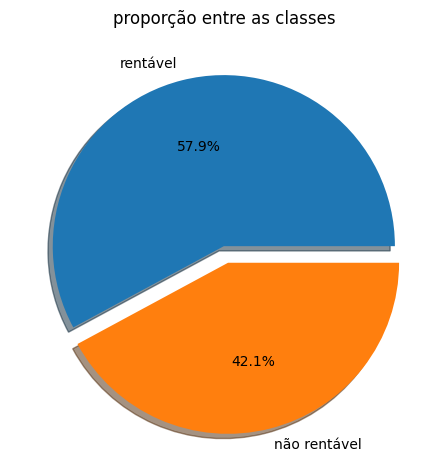

In [5]:
#gráfico de pizza do atributo gender_percent em relação aos zeros
valor = [len(df[df['class'] == 1]),len(df[df['class'] == 0])]
label = ['rentável','não rentável']
explode = (0, 0.1)
fig, ax = plt.subplots()
ax.pie(valor, explode=explode, labels=label, autopct='%1.1f%%',shadow=True)
plt.title('proporção entre as classes')
plt.tight_layout()
plt.show()

Podemos notar que embora o desbalanceamento entre as classes não seja muito gritante, é notável que as classes não estão balanceadas. Além disso, podemos inferir que o erro majoritário dos modelos de classificação é referente à classe majoritária, que neste caso é a classe rentável, representada pelo valor 1.

In [6]:
df.columns

Index(['title', 'year', 'actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count', 'averageRating', 'numVotes', 'budget', 'revenue',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent', 'Animation', 'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult',
       'revenue_budget', 'class', 'moviesByYear'],
      dtype='object')

In [7]:
columns = ['actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count', 'averageRating', 'numVotes', 'budget',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent', 'Animation', 'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult', 'class', 'revenue']

MODELO DE CLASSIFICAÇÃO

FEATURE SELECTION

Vamos selecionar quais variáveis contribuem mais para a variável alvo classe.
Primeiramente valos analisar novamente a correlação entre as variáveis independentes e a variável classe.
Aquelas variáveis possuem forte correlação entre si, pois existe uma relação de composição entre si (uma variável foi gerada pela presença de outra), como actress_percent que é composta por actesses_count, não podem ser utilizadas ao mesmo tempo, portanto a escolha será a critério da maior correlação.

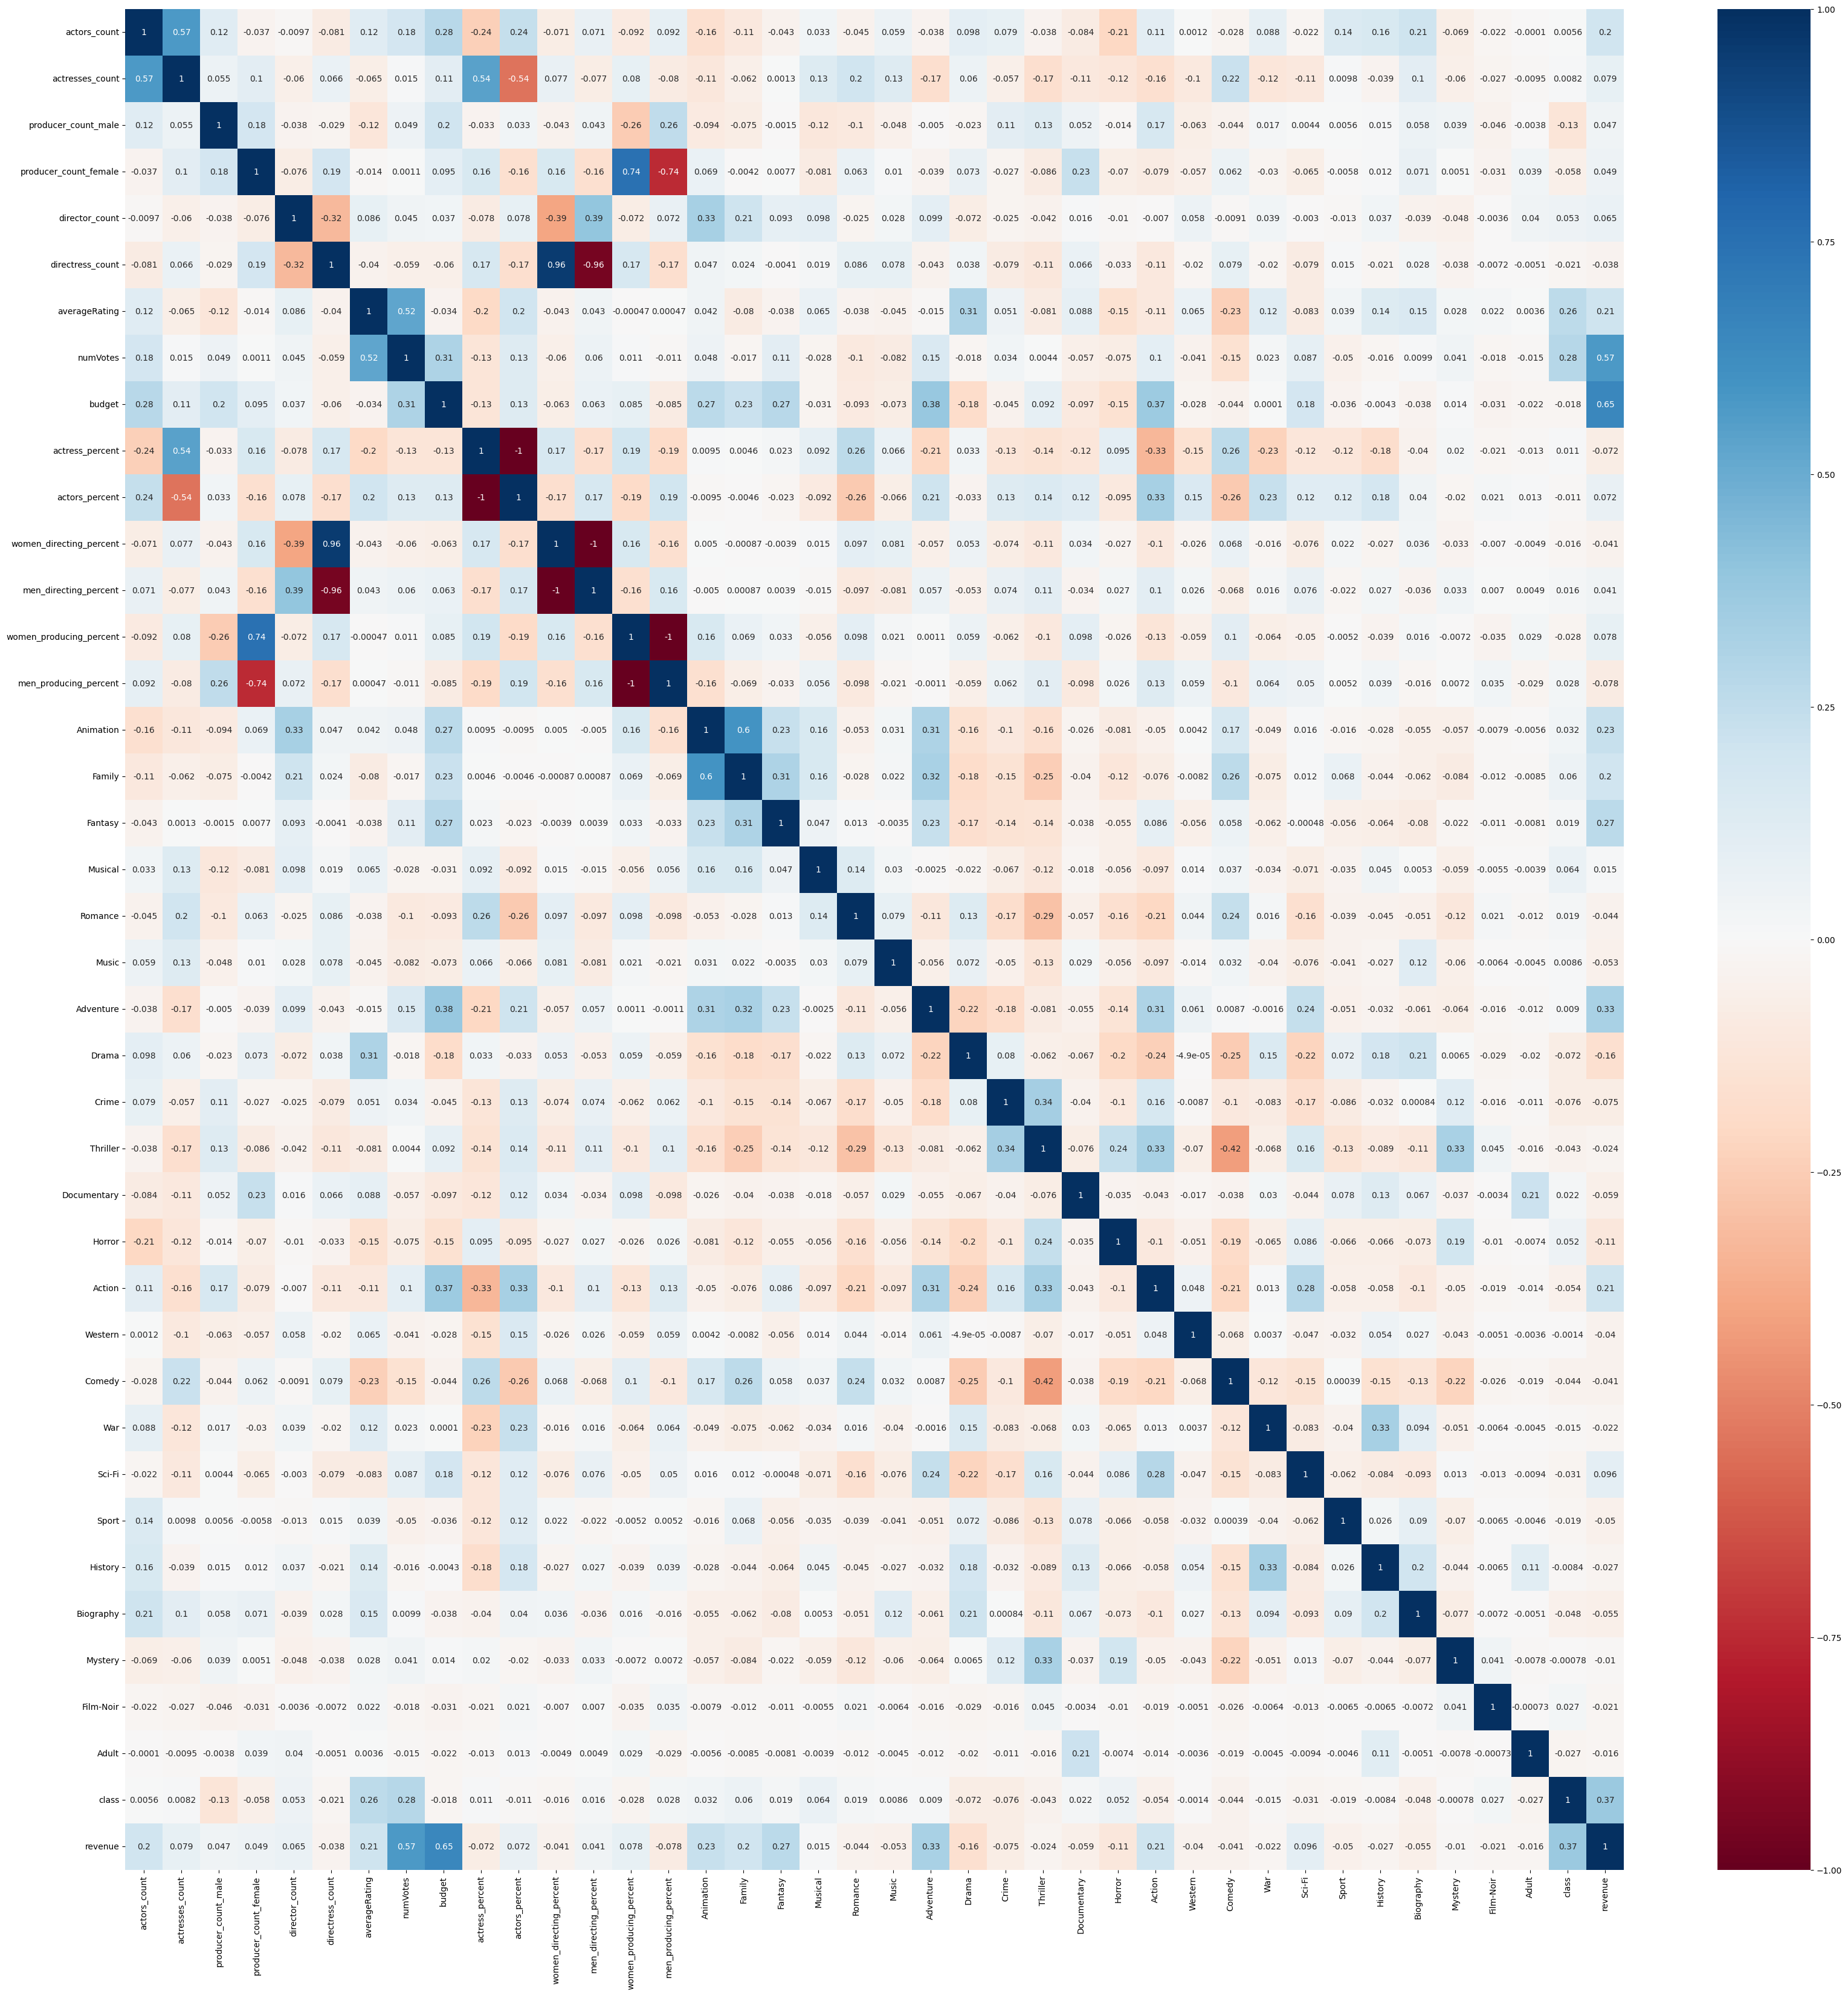

In [8]:
plt.figure(figsize = (40,40))
sns.heatmap(df[columns].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Analisando como as variáveis numéricas contínuas se relacionam com a variável classe, as variáveis percentuais como actress_percent, possuem uma correlação maior com a classe. 

Como actress_percent e actors_percent são variáveis complementares, não podemos utilizar ambas no modelo, pois a correlação entre elas é extremamente forte. Como nosso objetivo é verificar se o percentual de mulheres em uma produção cinematográfica pode gerar um filme rentável, iremos focar em utilizar as variáveis respectivas ao gênero feminino. Com relação as variáveis categóricas, apenas duas tem forte correlação entre si, que são Animation e Family. A escolha sera feita com base na variável que possui maior correlação com a variável alvo, neste caso a variável Family será usada. Outras variáveis como year e moviesByYear não fazem sentido serem utilizadas pois não possuem relação com a hipótese a ser validada com o modelo. Além disso existem variávels que fogem do controle de alguém que está planejando uma produção cinematográfica, na fase de pré produção mencionado anteriormente, como por exemplo número de votos (numVotes) e média de notas de avaliação (avarageRating), que apesar de serem bons indicadores de sucesso de um filme, não são valores que existem antes da produção de um filme, porém podem existir durante a fase de testes com público, ou seja, serão úteis para o modelo de pós produção. Vale ressaltar que como média de avaliações representa o somatório de notas dividito pelo total de votos (numVotes), podemos inferir que existe uma correlação intrinseca entre essas duas variáveis também, o que pode ser notado também pela correlação entre as duas variáveis. Portanto a escolha será feita pela aquela com maior correlação com a variável classe e com a variável revenue que desejamos prever futuramente no cenário de regressão.

Assim as variáveis escolhidas para um modelo de pre produção de um filme serão as definidas abaixo:

In [9]:
columns_classification_pre_production = ['budget',
       'actress_percent', 'women_directing_percent',
       'women_producing_percent',
       'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult', 'class']

Enquanto que as variáveis definidas para um modelo para o período de pós produção do filme estão definidas abaixo:

In [10]:
columns_classification_production = ['numVotes', 'budget',
       'actress_percent', 'women_directing_percent',
       'women_producing_percent',
       'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult', 'class']

Podemos combinar com outra técnica de seleção de variáveis para identificarmos as variáveis com maior importância na base de dados utilizando a propriedade de feature importance que vem embutida nos modelos de classificação baseados em árvores. Como possuímos quase 30 variáveis para ambos os modelos, iremos reduzir arbitrariamente pela metade o total de variáveis a serem utilizadas.

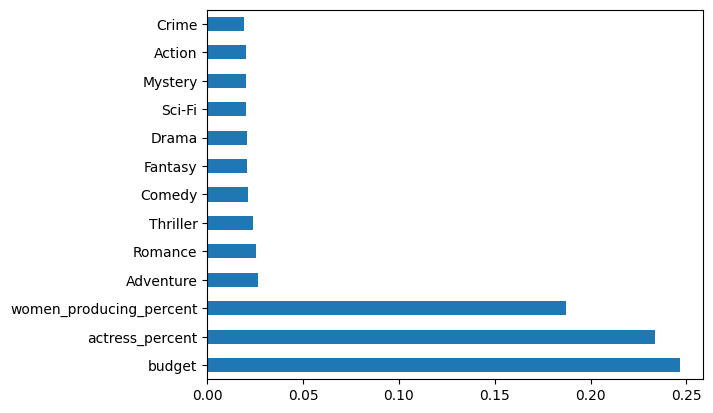

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
X = df[columns_classification_pre_production].copy()
X.drop('class', inplace=True, axis=1)
y = df['class'].copy()
n_largest = int(len(columns_classification_pre_production)/2)
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(n_largest, keep='all').plot(kind='barh')
plt.show()

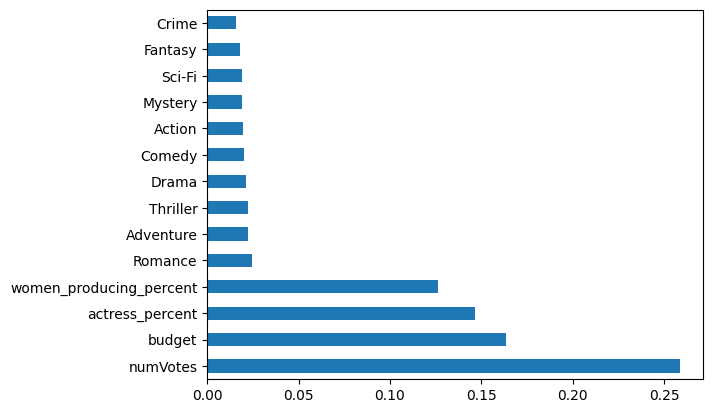

In [12]:
X = df[columns_classification_production].copy()
X.drop('class', inplace=True, axis=1)
y = df['class'].copy()
n_largest = int(len(columns_classification_production)/2)
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(n_largest, keep='all').plot(kind='barh')
plt.show()

Podemos notar que as variáveis categóricas possuem pouca importância em ambos os conjuntos de variáveis, fazendo sentido o descarte delas. Sendo assim as variáveis escolhidas para os modelos de classificação são as definidas a seguir:

In [13]:
columns_classification_pre_production = ['budget',
       'actress_percent', 'women_producing_percent','class']

columns_classification_production = ['numVotes', 'budget',
       'actress_percent', 'women_producing_percent', 'class']

AVALIAÇÃO DE MODELOS

Como nossa base se encontra desbalanceada, é recomendado o uso de validação cruzada com dobras (folds) que mantenham a proporção entre as classes. Portanto foi escolhido método KFOLD estratificado usando 5 folds, pois a base não é muito grande, então é desejável manter uma boa variedade de amostras nos folds, o que também justifica o não uso do leave one out. Como as classes não estão balanceadas e as características da base de dados não necessariamente implicam em utilizar o leave one out, é melhor não comprometer a variedade de dados entre os folds, pois o leave one out justamente acaba gerando várias iterações com folds muito parecidos entre elas, uma vez que temos apenas uma única amostra no conjunto de teste.

In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df_resultados_classificacao = pd.DataFrame(columns=['MODELO', 'MEDIA_TESTE', 'MEDIA_TREINO', 'MEDIA_FIT_TIME'])


Vamos definir um pipeline para cada modelo, o que garante que qualquer tipo de transformação nos dados, exigida por alguns modelos, não gere data leakage, ou seja, que informações do conjunto de teste vazem para o conjunto de treino.

In [15]:
def avalia_modelo(steps, cv, columns, predict_column, df, nome_modelo, metrica):
    x = df[columns].copy()
    x.drop(predict_column, inplace=True, axis=1)
    y = df[predict_column]
    pipeline = Pipeline(steps)
    results = cross_validate(pipeline, X=x, y=y, cv=cv, return_train_score=True, scoring=metrica)
    media_teste = results['test_score'].mean()
    media_treino = results['train_score'].mean()
    media_fit_time = results['fit_time'].mean()
    dado = pd.DataFrame([{'MODELO': nome_modelo, 'MEDIA_TESTE': media_teste, 'MEDIA_TREINO': media_treino, 'MEDIA_FIT_TIME': media_fit_time}])
    return {'resultado': dado, 'pipeline': pipeline}

Para modelos que a escala das variáveis é capaz de provocar uma interpretação do modelo equivocada, indicando que uma variável tem maior peso e importância do que deveria, e também para garantir que a influência de outliers seja minimizada, utilizaremos o RobustScaler. Algoritmos baseados em árvores e ensembles não necessitam de feature scaling, pois as separações dos resultados preditos são realizados nos valores individuais das variáveis.

A base de dados representa um problema de classificação binário, ou seja, temos apenas duas classes a serem preditas dentro da variável alvo classe. Os modelos de classificação escolhidos tem características únicas que podem ser justificadas para uso em um problema de classificação binária, que se adequam às especificidades do conjunto de dados e dos requisitos do problema. Abaixo listaremos os modelos avaliados e suas características mais relevantes para justificar a escolha:

*SVC*:
- *Margem Máxima*: Sendo uma implementação do SVM para classificação, busca encontrar o hiperplano que maximiza a margem entre as classes. Isso ajuda a evitar o sobreajuste e proporciona uma melhor generalização do modelo.
- *Robusto a outliers*: O SVM é menos sensível a outliers do que outros algoritmos de classificação, pois ele tenta maximizar a margem usando os vetores de suporte, que são os pontos mais próximos ao hiperplano de decisão.

*DecisionTreeClassifier*:
- *Interpretabilidade*: As árvores de decisão são fáceis de entender e interpretar, o que pode ser útil quando a explicabilidade do modelo é importante.
- *Não paramétrico*: Funciona bem sem a necessidade de assumir a distribuição dos dados.

*RandomForestClassifier*:
- *Redução de Overfitting*: Ao combinar várias árvores de decisão, o RandomForest reduz o risco de overfitting que é comum em uma única árvore de decisão.
- *Importância de Features*: Pode fornecer insights sobre a importância dos recursos para a classificação.

*AdaBoostClassifier*:
- *Aumento de Desempenho*: O AdaBoost, um dos modelos de ensemble mais comuns, semelhante ao Random Forest, pode melhorar o desempenho de modelos simples ao combinar vários classificadores fracos para formar um classificador forte.
- *Flexibilidade*: Pode ser usado com vários tipos de classificadores base.

*KNeighborsClassifier*:
- *Simplicidade*: O KNN é um algoritmo simples e eficaz que não requer treinamento de modelo, baseando-se na proximidade dos vizinhos mais próximos.
- *Não paramétrico*: Funciona bem com conjuntos de dados onde a relação entre as variáveis não é linear.

*GaussianNB (NB)*:
- *Rapidez*: O Naive Bayes é conhecido por ser rápido e eficiente, especialmente em grandes conjuntos de dados.
- *Baseado em Probabilidade*: Bom para estimativas de probabilidade e quando as características são independentes.

*MLPClassifier (MLP)*:
- *Modelagem de Relações Complexas*: As redes neurais são capazes de modelar relações não lineares complexas entre os recursos.
- *Flexibilidade*: Pode ser ajustado com diferentes arquiteturas e funções de ativação para diversos problemas.

Abaixo temos a definição de como cada algoritmo será executado, definindo o pipeline adequado, o nome pelo qual será identificado o modelo gerado e quais as features serão usadas.

In [16]:
modelos_classificacao = [{'pipeline': [('scaler', RobustScaler()), ('pca', PCA(0.8)), ('svc', SVC())], 'nome': 'SVC PRE PRODUCAO', 'features': columns_classification_pre_production},
           {'pipeline': [('scaler', RobustScaler()), ('pca', PCA(0.8)), ('svc', SVC())], 'nome': 'SVC PRODUCAO', 'features': columns_classification_production},
           {'pipeline': [('tree', DecisionTreeClassifier())], 'nome': 'DECISION TREE PRE PRODUCAO', 'features': columns_classification_pre_production},
           {'pipeline': [('tree', DecisionTreeClassifier())], 'nome': 'DECISION TREE PRODUCAO', 'features': columns_classification_production},
           {'pipeline': [('tree', RandomForestClassifier())], 'nome': 'RANDOM FOREST PRE PRODUCAO', 'features': columns_classification_pre_production},
           {'pipeline': [('tree', RandomForestClassifier())], 'nome': 'RANDOM FOREST PRODUCAO', 'features': columns_classification_production},
           {'pipeline': [('scaler', RobustScaler()), ('knn', KNeighborsClassifier())], 'nome': 'KNN PRE PRODUCAO', 'features': columns_classification_pre_production},
           {'pipeline': [('scaler', RobustScaler()), ('knn', KNeighborsClassifier())], 'nome': 'KNN PRODUCAO', 'features': columns_classification_production},
           {'pipeline': [('nb', NB())], 'nome': 'NAIVE BAYES PRE PRODUCAO', 'features': columns_classification_pre_production},
           {'pipeline': [('nb', NB())], 'nome': 'NAIVE BAYES PRODUCAO', 'features': columns_classification_production},
           {'pipeline': [('scaler', RobustScaler()), ('pca', PCA(0.8)), ('mlp', MLP())], 'nome': 'MLP PRE PRODUCAO', 'features': columns_classification_pre_production},
           {'pipeline': [('scaler', RobustScaler()), ('pca', PCA(0.8)), ('mlp', MLP())], 'nome': 'MLP PRODUCAO', 'features': columns_classification_production},
           {'pipeline': [('ada', AdaBoostClassifier())], 'nome': 'ADA BOOST PRE PRODUCAO', 'features': columns_classification_pre_production},
           {'pipeline': [('ada', AdaBoostClassifier())], 'nome': 'ADA BOOST PRODUCAO', 'features': columns_classification_production}]

A métrica de avaliação utilizada será a Precision, uma vez que há o risco de avaliarmos um filme não rentável como rentável ter potencial de gerar um prejuízo muito maior futuramente, ou seja, desejamos minizar os falsos positivos classificados pelo modelo.

Os modelos serão primeiramente avaliados de acordo com a melhor métrica no conjunto de teste e avaliando se ouve overfitting e em seguida de acordo com o menor tempo de execução.

In [17]:
resultado_final = {}
i = 0
for modelo in modelos_classificacao:
    print(modelo['nome'])
    resultado = avalia_modelo(steps=modelo['pipeline'],
                                            cv=skf,
                                            columns=modelo['features'],
                                            df=df,
                                            predict_column='class',
                                            nome_modelo=modelo['nome'],
                                            metrica='precision')
    dado = resultado['resultado']
    df_resultados_classificacao = pd.concat([dado], ignore_index=True) if i == 0 else pd.concat([df_resultados_classificacao, dado], ignore_index=True)
    resultado_final[modelo['nome']] = resultado['pipeline']
    
    i += 1

SVC PRE PRODUCAO
SVC PRODUCAO
DECISION TREE PRE PRODUCAO
DECISION TREE PRODUCAO
RANDOM FOREST PRE PRODUCAO
RANDOM FOREST PRODUCAO
KNN PRE PRODUCAO
KNN PRODUCAO
NAIVE BAYES PRE PRODUCAO
NAIVE BAYES PRODUCAO
MLP PRE PRODUCAO
MLP PRODUCAO
ADA BOOST PRE PRODUCAO
ADA BOOST PRODUCAO


Podemos notar abaixo que o melhor algoritmo para a solução de classificação para pré produção foi o ADA BOOST. No entanto, o KNN se mostrou tão bom quanto e com um tempo de execução muito menor, o que o torna candidato a ser a escolha para otimização de hiperparametros e ser o algoritmo escolhido, pois é mais simples, rápido e tão eficiente nos seus resultados quanto o algortimo que obteve a melhor métrica de avaliação nos folds de teste, e podemos notar que não aparenta haver presença de overfitting, uma vez que a métrica cai se compararmos a média dos conjuntos de treino com os conjuntos de teste, no entanto ela não aparenta estar superajustada ao conjunto de treino, o que ocorre claramente nos algoritmos baseados em árvore.

In [18]:
df_resultados_pre_producao = df_resultados_classificacao[df_resultados_classificacao.MODELO.str.contains('PRE')].sort_values('MEDIA_TESTE', ascending=False)
df_resultados_pre_producao

,MODELO,MEDIA_TESTE,MEDIA_TREINO,MEDIA_FIT_TIME
4,RANDOM FOREST PRE PRODUCAO,0.606978,0.989803,0.172837
12,ADA BOOST PRE PRODUCAO,0.605645,0.635416,0.078778
6,KNN PRE PRODUCAO,0.604859,0.735057,0.003901
2,DECISION TREE PRE PRODUCAO,0.600577,0.998644,0.000000
10,MLP PRE PRODUCAO,0.598579,0.610601,0.645567
0,SVC PRE PRODUCAO,0.589585,0.597638,0.045079
8,NAIVE BAYES PRE PRODUCAO,0.578785,0.578785,0.001311


Já para o problema de classificação para pós produção podemos notar o impacto que a variável numVotes possui na predição, uma vez que impulsionou positivamente os resultados de todos os algoritmos avaliados, indicando certa coerência, uma vez que quanto mais pessoas votaram, pode significar que mais pessoas assitiram o filme, e quanto mais pessoas assitem, maior é a arrecadação, potencializando ainda mais a capacidade de rentabilidade do filme. Neste caso o algoritmo Naive Bayes é a escolha óbvia não somente por ter obtido a melhor métrica nos conjuntos de teste, como também claramente parece ser um modelo com um fit dos conjuntos de treinamento aparentemente confiável e é o modelo mais eficiente em termos de tempo de execução.

In [19]:
df_resultados_producao = df_resultados_classificacao[~df_resultados_classificacao.MODELO.str.contains('PRE')].sort_values('MEDIA_TESTE', ascending=False)
df_resultados_producao

,MODELO,MEDIA_TESTE,MEDIA_TREINO,MEDIA_FIT_TIME
9,NAIVE BAYES PRODUCAO,0.812705,0.813032,0.001725
11,MLP PRODUCAO,0.757773,0.757703,1.094075
1,SVC PRODUCAO,0.752585,0.759499,0.030368
13,ADA BOOST PRODUCAO,0.746110,0.778388,0.069276
5,RANDOM FOREST PRODUCAO,0.745079,0.999778,0.231761
7,KNN PRODUCAO,0.731028,0.806923,0.005236
3,DECISION TREE PRODUCAO,0.723084,1.000000,0.004315


Os hiperparametros escolhidos para a otimização do KNN e a sua justificativa encontram-se a seguir:

- *n_neighbors*: Talvez o hiperparâmetro mais importante para o KNN, determina o número de vizinhos a serem considerados ao fazer previsões. 

- *weights*: Determina como os pesos são atribuídos aos vizinhos ao fazer previsões. As opções são ‘uniform’ (todos os vizinhos têm o mesmo peso) e ‘distance’ (os vizinhos mais próximos têm mais peso).

- *metric*: Determina a métrica de distância a ser usada. A opção padrão é ‘minkowski’, mas outras opções incluem ‘euclidean’, ‘manhattan’, ‘chebyshev’, e outras.

- *algorithm*: Determina o algoritmo a ser usado para calcular os vizinhos mais próximos. As opções são ‘auto’, ‘ball_tree’, ‘kd_tree’, e ‘brute’.

A escolha pelo randomized search se deve ao tempo de execução consideravelmente menor e a capacidade de produzir resultados ainda assim satisfatórios, sendo um saldo positivo frente ao custo computacional da força bruta usada no Grid search.

In [20]:
x = df[columns_classification_pre_production].copy()
x.drop('class', inplace=True, axis=1)
y = df['class']
param = {
    'knn__n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

opt = RandomizedSearchCV(resultado_final[df_resultados_pre_producao[df_resultados_pre_producao.MODELO.str.contains('KNN')].MODELO.values[0]], 
                         n_iter=300, param_distributions=param, cv=skf, n_jobs=-1, return_train_score=True, scoring='precision', random_state=42)
opt.fit(X=x, y=y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'knn__algorithm': ['auto', 'ball_tree',
                                                           'kd_tree', 'brute'],
                                        'knn__metric': ['minkowski',
                                                        'euclidean',
                                                        'manhattan',
                                                        'chebyshev'],
                                        'knn__n_neighbors': [5, 10, 15, 20, 25,
                                                             30, 35, 40],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=42, return_train_score=True,
                   scoring='precision')

In [21]:
df_result_grid_pre_production = pd.DataFrame([opt.best_params_])
df_result_grid_pre_production

,knn__weights,knn__n_neighbors,knn__metric,knn__algorithm
0,uniform,30,chebyshev,brute


Podemos notar que de fato, conseguimos otimizar o algoritmo a ponto de aumentarmos aproximadamente mais 2 pontos percentuais na métrica escolhida.

In [22]:
df_score_grid_pre_production = pd.DataFrame([opt.best_score_])
df_score_grid_pre_production

,0
0,0.62252


Para o algoritmo Naive Bayes, neste caso a versão Gaussian Naive Bayes, iremos otimizar o seguinte huperparametro:

- *var_smoothing*: Este hiperparâmetro é usado para suavização e é especialmente útil para evitar a divisão por zero quando todas as características são zero (o que é comum em textos).

In [23]:
x = df[columns_classification_production].copy()
x.drop('class', inplace=True, axis=1)
y = df['class']

param = {
    'nb__var_smoothing': np.logspace(0,-9, num=10000)
}

opt = RandomizedSearchCV(resultado_final[df_resultados_producao.MODELO.values[0]], n_iter=500, param_distributions=param, 
                         cv=skf, n_jobs=-1, return_train_score=True, scoring='precision', random_state=42)
opt.fit(X=x, y=y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('nb', GaussianNB())]), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'nb__var_smoothing': array([1.00000000e+00, 9.97929612e-01, 9.95863511e-01, ...,
       1.00415367e-09, 1.00207468e-09, 1.00000000e-09])},
                   random_state=42, return_train_score=True,
                   scoring='precision')

In [24]:
df_result_grid_production = pd.DataFrame([opt.best_params_])
df_result_grid_production

,nb__var_smoothing
0,0.000002


Podemos notar que o ganho com a otimização não é tão expressivo com o Naive Bayes, no entanto isso não é um problema, o resultado gerado pelo algoritmo já entrega uma métrica satisfatória, o que pode ser muito interessante para justamente confirmar já nas etapas finais da produção, após fases de testes com público, se um filme será ou não rentável.

In [25]:
df_score_grid_production = pd.DataFrame([opt.best_score_])
df_score_grid_production

,0
0,0.813016


REGRESSÃO

Da mesma forma que selecionamos as variáveis para classificação, analisamos as variáveis que possuem maior correlação com a variável alvo revenue. Como vimos na análise dos dados, variáveis que trazem corte de gênero sexual na base pouco influenciam no quanto um filme arrecada de fato, diferente das classes. Portanto nenhuma variável referente a gênero não será usada. Abaixo encontram-se as variáveis selecionadas a priori.

In [26]:
df.columns

Index(['title', 'year', 'actors_count', 'actresses_count',
       'producer_count_male', 'producer_count_female', 'director_count',
       'directress_count', 'averageRating', 'numVotes', 'budget', 'revenue',
       'actress_percent', 'actors_percent', 'women_directing_percent',
       'men_directing_percent', 'women_producing_percent',
       'men_producing_percent', 'Animation', 'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult',
       'revenue_budget', 'class', 'moviesByYear'],
      dtype='object')

In [27]:
columns_regression_production = ['numVotes', 'budget', 'Family', 'Fantasy', 'Musical',
       'Romance', 'Music', 'Adventure', 'Drama', 'Crime', 'Thriller',
       'Documentary', 'Horror', 'Action', 'Western', 'Comedy', 'War', 'Sci-Fi',
       'Sport', 'History', 'Biography', 'Mystery', 'Film-Noir', 'Adult', 'revenue']

Vamos analisar agora a importância que as variáveis possuem na contribuição para o modelo, e vamos selecionar aquelas que apresentam maior contribuição para a variável revenue.

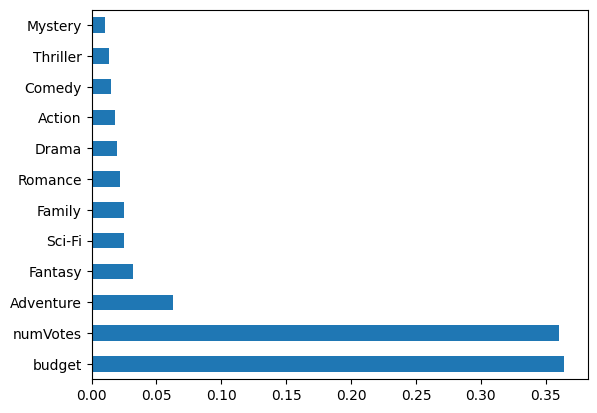

In [28]:
X = df[columns_regression_production].copy()
X.drop('revenue', inplace=True, axis=1)
y = df['revenue'].copy()
n_largest = int(len(columns_regression_production)/2)
model = ExtraTreesRegressor()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(n_largest, keep='all').plot(kind='barh')
plt.show()

Novamente podemos notar que as variáveis categóricas referentes aos gêneros dos filmes possuem pouca contribuição, tornando o seu uso descartável para o modelo, sendo assim, o conjunto de variáveis de entrada será composto apenas por numVotes e budget.

In [29]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [30]:
columns_regression_production = ['numVotes', 'budget', 'revenue']


In [31]:
df_resultados_regressao = pd.DataFrame(columns=['MODELO', 'MEDIA_TESTE', 'MEDIA_TREINO', 'MEDIA_FIT_TIME'])

Assim como nos modelos de classificação, definimos uma lista contendo as configurações dos pipelines de cada modelo, definindo seu nome e qual conjunto de variáveis será usado.

In [32]:
modelos_regressao = [{'pipeline': [('scaler', RobustScaler()), ('linear_reg', LinearRegression())], 'nome': 'REGRESSAO LINEAR', 'features': columns_regression_production},
           {'pipeline': [('scaler', RobustScaler()), ('linear_reg', ElasticNet())], 'nome': 'ELASTIC NET REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('scaler', RobustScaler()), ('linear_reg', GradientBoostingRegressor(loss='quantile', alpha=0.5))], 'nome': 'GRADIENT BOOST QUANTILE REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('scaler', RobustScaler()), ('linear_reg', PoissonRegressor())], 'nome': 'POISSON REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('scaler', RobustScaler()), ('linear_reg', SVR())], 'nome': 'SVR REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('scaler', RobustScaler()), ('linear_reg', BayesianRidge())], 'nome': 'BAYESIAN RIDGE REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('scaler', RobustScaler()), ('linear_reg', MLPRegressor())], 'nome': 'MLP REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('scaler', RobustScaler()), ('linear_reg', SGDRegressor())], 'nome': 'SGD REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('linear_reg', DecisionTreeRegressor())], 'nome': 'DECISION TREE REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('linear_reg', RandomForestRegressor())], 'nome': 'RANDOM FOREST REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('linear_reg', HuberRegressor())], 'nome': 'HUBER REGRESSOR', 'features': columns_regression_production},
           {'pipeline': [('linear_reg', RANSACRegressor())], 'nome': 'RANSAC REGRESSOR', 'features': columns_regression_production},]

No entanto, antes de avaliarmos os modelos gerados, vamos fazer uma breve análise dos *residuals* entre as variáveis de entrada e a variável alvo.

*RESIDUALS* ENTRE NUMVOTES E REVENUE

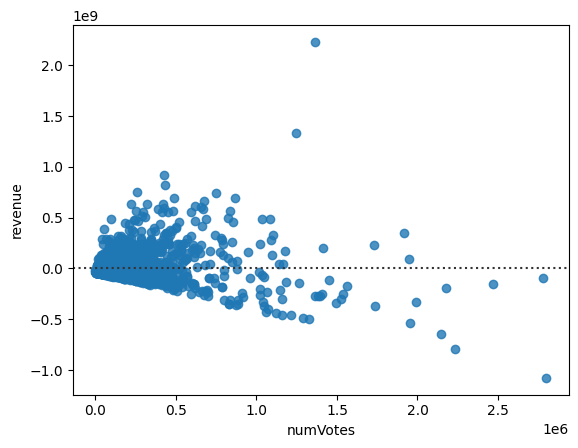

In [33]:
sns.residplot(x='numVotes', y='revenue', data=df, robust=True) 
  
plt.show()

*RESIDUALS* ENTRE BUDGET E REVENUE

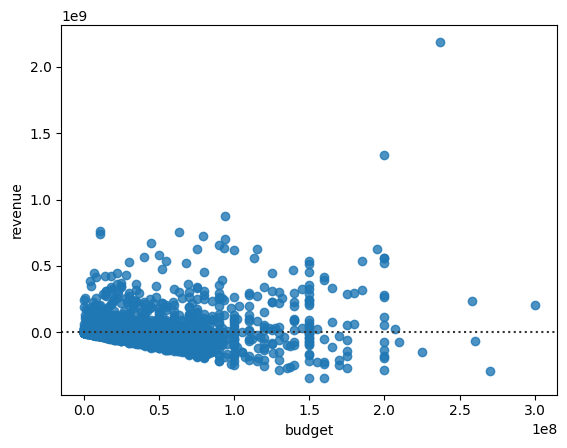

In [34]:
sns.residplot(x='budget', y='revenue', data=df, robust=True) 
  
plt.show()

Podemos notar que apesar de em ambos os plots, seja possível observar uma alta densidade de pontos próximos à origem e baixa densidade de pontos distantes da origem, podemos notar que não existe simetria em relação a origem. Essa observação nos leva a notar que a distribuição dos *residuals* possui uma calda curta para valores abaixo da origem e uma calda mais longa para valores acima da origem. Em outras palavras podemos notar que a distribuição dos *residuals* não é normal. Isso pode gerar modelos com baixa generalização considerando os modelos de regressão linear mais ordinários, que de certa forma assumem que os resíduos possuem uma distribuição normal. O que justifica a escolha de alguns algoritmos listados anteriormente, como: 

- Algoritmos baseados em árvores
- Algoritmos de regressão robusta
- Máquinas de vetores de suporte
- Regressão quantílica
- Regressão de Poisson 
- Redes neurais

A métrica escolhida é a MAE, Média do Erro Absoluto. É uma métrica interessante pois ela se encontra na mesma unidade que a variável predita, facilitando a interpretabilidade, é robusta a outliers e possui uma simetria quanto a tratar igualmente as superestimativas e as subestimativas.

In [35]:
resultado_final_regressao = {}
i = 0
for modelo in modelos_regressao:
    print(modelo['nome'])
    resultado = avalia_modelo(steps=modelo['pipeline'],
                                            cv=kfold,
                                            columns=modelo['features'],
                                            df=df,
                                            predict_column='revenue',
                                            nome_modelo=modelo['nome'],
                                            metrica='neg_mean_absolute_error')
    dado = resultado['resultado']
    df_resultados_regressao = pd.concat([dado], ignore_index=True) if i == 0 else pd.concat([df_resultados_regressao, dado], ignore_index=True)
    resultado_final_regressao[modelo['nome']] = resultado['pipeline']
    
    i += 1

REGRESSAO LINEAR
ELASTIC NET REGRESSOR
GRADIENT BOOST QUANTILE REGRESSOR
POISSON REGRESSOR
SVR REGRESSOR
BAYESIAN RIDGE REGRESSOR
MLP REGRESSOR
SGD REGRESSOR
DECISION TREE REGRESSOR
RANDOM FOREST REGRESSOR
HUBER REGRESSOR
RANSAC REGRESSOR


In [36]:
df_resultados_regressao['MEDIA_TESTE'] = df_resultados_regressao.MEDIA_TESTE * -1
df_resultados_regressao['MEDIA_TREINO'] = df_resultados_regressao.MEDIA_TREINO * -1

df_resultados_regressao.sort_values(by='MEDIA_TESTE', inplace=True)
df_resultados_regressao.reset_index(inplace=True, drop=True)
df_resultados_regressao

,MODELO,MEDIA_TESTE,MEDIA_TREINO,MEDIA_FIT_TIME
0,GRADIENT BOOST QUANTILE REGRESSOR,5.836277e+07,5.167296e+07,0.269937
1,HUBER REGRESSOR,6.395916e+07,6.346186e+07,0.013175
2,RANDOM FOREST REGRESSOR,6.504578e+07,2.436250e+07,0.317544
3,REGRESSAO LINEAR,6.644847e+07,6.599789e+07,0.006907
4,SGD REGRESSOR,6.652223e+07,6.607615e+07,0.006674
5,RANSAC REGRESSOR,6.686104e+07,6.682402e+07,0.008820
6,ELASTIC NET REGRESSOR,6.886606e+07,6.844248e+07,0.004032
7,POISSON REGRESSOR,7.863259e+07,7.524345e+07,0.043161
8,DECISION TREE REGRESSOR,8.392286e+07,2.151820e+03,0.006704
9,SVR REGRESSOR,1.003203e+08,1.002549e+08,0.090477


Podemos notar que de fato os modelos que melhor se saíram foram os de regressão quantílica, floresta e regressão robusta. Podemos notar presença clara de overfitting no modelo de árvore de decisão, onde temos um erro extremamente baixo nos conjuntos de treino e alto nos conjuntos de teste, indicando superajustamento do modelo aos conjuntos de treinamento e baixa generalização nas predições realizadas pelo mesmo.

In [37]:
def plot_best_fit(X, y, model):
    model.fit(X, y)
    plt.scatter(X, y)
    xaxis = np.arange(x.min(), x.max(), 10)
    yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
    plt.plot(xaxis, yaxis, color='r')
    plt.title(type(model).__name__)
    plt.show()

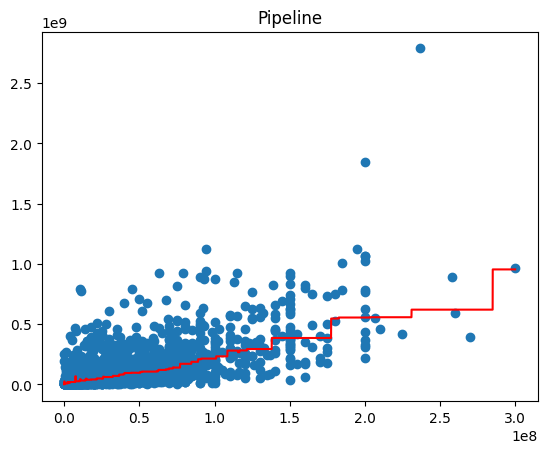

In [38]:
x = df[['budget', 'revenue']].copy()
x.drop('revenue', inplace=True, axis=1)
x = x.values
y = df['revenue'].values
plot_best_fit(X=x, y=y, model=resultado_final_regressao[df_resultados_regressao.MODELO.values[0]])

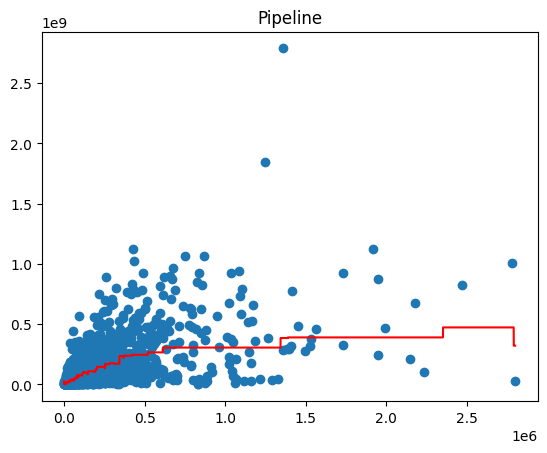

In [39]:
x = df[['numVotes', 'revenue']].copy()
x.drop('revenue', inplace=True, axis=1)
x = x.values
y = df['revenue'].values
plot_best_fit(X=x, y=y, model=resultado_final_regressao[df_resultados_regressao.MODELO.values[0]])

In [40]:
df['revenue'].mean()

124404663.71421215

Ao observarmos o plot da regressão do melhor modelo utilizando numVotes e budget vs a variável revenue, podemos ver que a distribuição da variável revenue dificulta muito o ajuste do modelo aos dados, no entanto existe uma aparente tendência no comportamento do modelo de acordo com a disposição dos dados. No entanto, estamos dizendo que em média, o erro absoluto do modelo, é de cerca de 58 milhões de dólares, sendo que a média de revenue é de cerca de 124 milhões de dólares. Isso significa que a magnitude do erro do modelo é em média, quase a metade da média dos valores presentes nos dados reais, resultando em um modelo não muito confiável. Podemos otimizar o modelo para tentar reduzir, mas a otimização apenas faz um ajuste fino no modelo podendo melhorar levemente o modelo, mas reduzir o erro na escala de milhões podemos inferir que é pouco provável.

In [46]:
x = df[columns_regression_production].copy()
x.drop('revenue', inplace=True, axis=1)
y = df['revenue']


param_grid_sgd = { 
    'linear_reg__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 
    'linear_reg__learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'linear_reg__max_depth': [3, 6, 9, 12, 15],
    'linear_reg__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'linear_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'linear_reg__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
} 

grid = RandomizedSearchCV(resultado_final_regressao[df_resultados_regressao.MODELO.values[0]], n_iter=200, 
                          param_distributions=param_grid_sgd, cv=kfold, n_jobs=-1, return_train_score=True, 
                          random_state=42, scoring='neg_mean_absolute_error')
grid.fit(X=x, y=y)

In [42]:
df_result_grid_production = pd.DataFrame([grid.best_params_])
df_result_grid_production

,linear_reg__n_estimators,linear_reg__min_samples_split,linear_reg__min_samples_leaf,linear_reg__max_depth,linear_reg__learning_rate,linear_reg__alpha
0,150,9,8,3,0.1,0.5


In [43]:
df_score_grid_production = pd.DataFrame([grid.best_score_])
df_score_grid_production

,0
0,-5.803813e+07


In [44]:
df_resultados_regressao.MEDIA_TESTE.values[0] + grid.best_score_

324638.01135100424

Como podemos notar, que com a otimização realizada conseguimos reduzir o erro em menos de 500 mil dólares, o que infelizmente não é suficiente para tornar o modelo confiável o suficiente para dizer quanto de fato um filme arrecadará.

Por fim, podemos concluir que a base de dados apesar de possuir coerência com a representação esperada do domínio do problema, podemos inferir que a quantidade limitada de amostras que foram capazes de serem geradas após todo o processo de etl, préprocessmento, limpeza, etc, carece de mais informações que possam contribuir mais para modelos supervisionados tanto de classificação quanto de regressão, podendo melhorar a clusterização dos filmes e gerar classes mais condizentes com a realidade, diminuição da força dos outliers, que no caso desta base de dados não desejamos remove-los pois representam filmes importantes, e mais características referentes aos filmes que possam agregar ainda mais para modelos mais satisfatórios. No entanto ainda foi possível a geração de modelos de classificação capazes de entregar resultados minimamente confiáveis, no caso da etapa de pré produção, indicando mais de 60% de chance de o filme ter sido classificado corretamente como rentável, e modelos bem mais confiáveis para a etapa de pós produção e de até mesmo lançamento do filme, onde temos mais de 80% de precisão no modelo garantindo que o que de fato é classificado como rentável é verdadeiro.

Por outro lado, infelizmente ainda não é possível conseguir um modelo de regressão confiável o suficiente para que possamos ter uma previsão futura de quanto um filme pode gerar em receita de fato. Uma possibilidade seria adquirir uma base histórica que apresente semanalmente a bilheteria do filme durante seu tempo de exibição possibilitando aplicação de modelos de séries temporais. Porém, existe a possibilidade de muitos filmes não possuírem esse nível de informação por N motivos, ou o acesso a esse nível de granularidade ser restrito a plataformas privadas.